In [1]:
import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import Series

from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [2]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [3]:
case = pd.read_csv('data/new/case_maret_july.csv')
case.set_index('date', inplace=True)

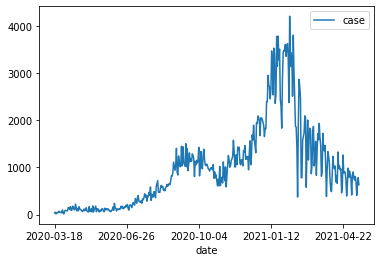

In [4]:
case.plot()
plt.show()

In [5]:
# ADF test untuk mobility london
for name, column in case.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6334
 No. Lags Chosen       = 17
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.4657. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [6]:
case_diff = case.diff(periods=1)
case_diff = case_diff.iloc[1:]
case_diff.head()

,case
date,
2020-03-19,12.0
2020-03-20,-36.0
2020-03-21,30.0
2020-03-22,-8.0
2020-03-23,15.0


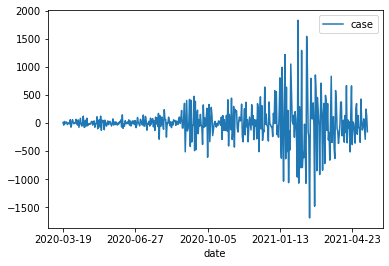

In [9]:
case_diff.plot()
plt.show()

In [10]:
# ADF test untuk mobility london
for name, column in case_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "case" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7239
 No. Lags Chosen       = 16
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


